In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import jaccard_similarity_score

%matplotlib inline

In [2]:
# Read Training data
X = pd.read_csv('../../data/problem-dataset/train.csv')
Y = X[['label']]
X = X.drop(["label"], axis=1)

In [3]:
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.3, 1, 3, 10, 30, 100]
scores = []

for alp in alphas:
    clf = OneVsOneClassifier(SGDClassifier(random_state = 0, alpha = alp)).fit(X.head(8000).values, Y.head(8000).T.values.ravel())
    Y_pred = clf.predict(X.tail(10000).values)
    scores.append(jaccard_similarity_score(Y.tail(10000).T.values.ravel(), Y_pred))

c:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


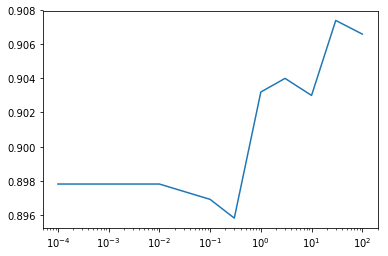

In [4]:
plt.plot(alphas, scores)
plt.xscale('log')

In [5]:
scores = []

for i in range(4):
    clf = OneVsOneClassifier(SGDClassifier(random_state = 0)).fit(X.head(8000).values, Y.head(8000).T.values.ravel())
    Y_pred = clf.predict(X.tail(10000).values)
    scores.append(jaccard_similarity_score(Y.tail(10000).T.values.ravel(), Y_pred))

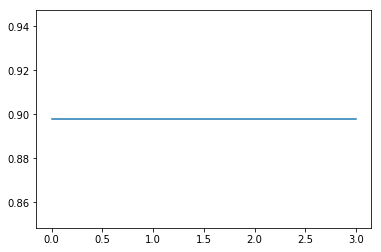

In [6]:
plt.plot(range(4), scores)

In [7]:
scores = []

for i in range(1, 11):
    clf = OneVsOneClassifier(SGDClassifier(random_state = 0, max_iter = 100 * i)).fit(X.head(8000).values, Y.head(8000).T.values.ravel())
    Y_pred = clf.predict(X.tail(10000).values)
    scores.append(jaccard_similarity_score(Y.tail(10000).T.values.ravel(), Y_pred))

c:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


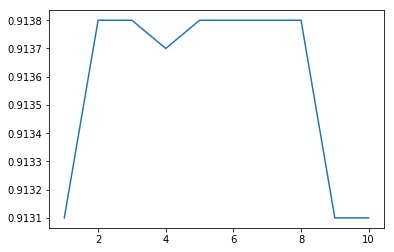

In [8]:
plt.plot(range(1, 11), scores)

In [9]:
X_test = pd.read_csv('../../data/problem-dataset/test.csv')

clf = OneVsOneClassifier(SGDClassifier(random_state = 0, alpha = 0.3, max_iter = 100)).fit(X.values, Y.T.values.ravel())
print(clf)

Y_pred = clf.predict(X_test.values)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.3, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)


In [10]:
frame = pd.DataFrame({'Label': Y_pred})
frame.insert(0, 'ImageId', range(1, 1 + len(frame)))
frame.to_csv('OnevsOneClassification-HyperParametersTuned.csv', index=False)